In [25]:
import numpy as np
import pandas as pd
from decimal import Decimal
from sklearn.linear_model import LinearRegression
from math import *
from numpy.linalg import *
import math
import os
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from pykrige.ok3d import OrdinaryKriging3D
import gstools as gs


pvalue: 0.02145430025635664


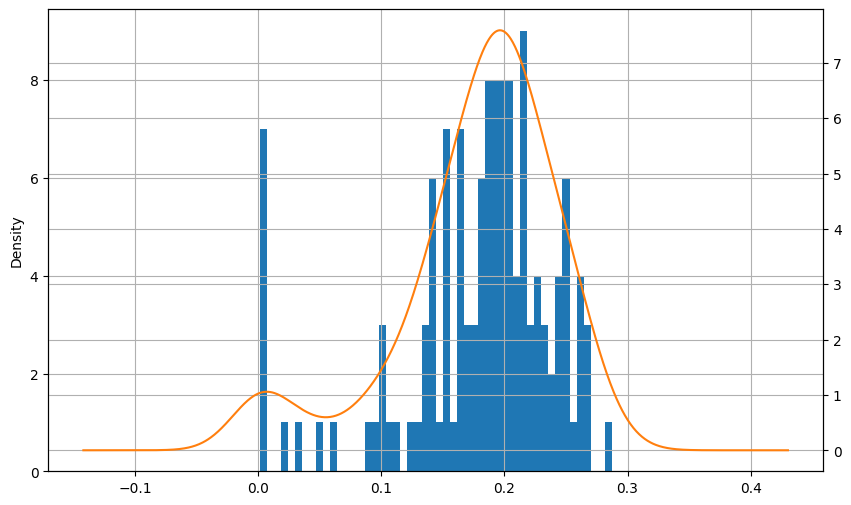

In [26]:
zone=2
path0="./train/well_por_zone_"+str(zone)+"_train.txt"
xyzv_all=np.loadtxt(path0,dtype=np.float32)
df  = pd.DataFrame(xyzv_all)
df
datas=df[3]
u = datas.mean()  # 计算均值
std = datas.std()  # 计算标准差 
result = stats.kstest(datas, 'norm', (u, std))
normal_flag=result[1]
print("pvalue:",normal_flag)
fig = plt.figure(figsize = (10,6))
ax2 = fig.add_subplot(1,1,1)
datas.hist(bins=50,ax = ax2)
datas.plot(kind = 'kde', secondary_y=True,ax = ax2)
plt.grid()

KstestResult(statistic=0.10500684513737685, pvalue=0.0990152454344263, statistic_location=-0.69427633, statistic_sign=-1)


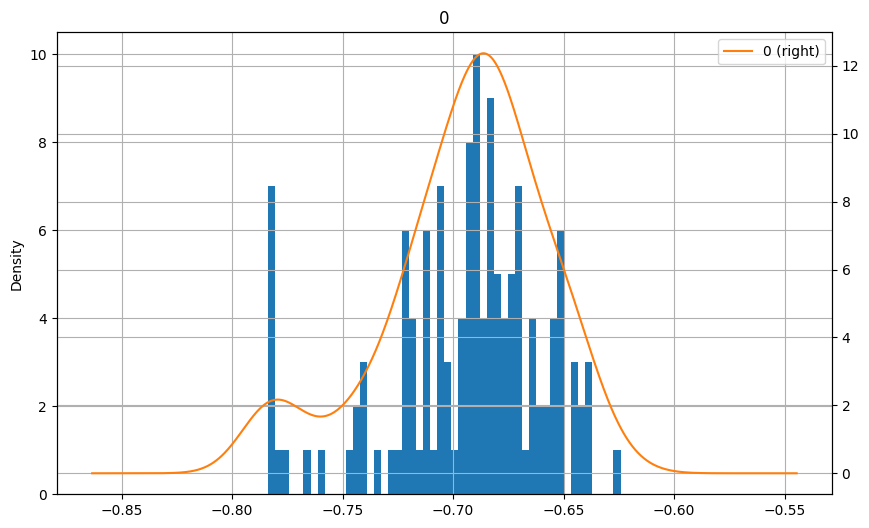

In [27]:
normal_datas,lamb  = stats.boxcox(datas) #对数据进行BOX-COX变换
u = np.array(normal_datas).mean()  # 计算均值
std = np.array(normal_datas).std()  # 计算标准差
p_value= stats.kstest(np.array(normal_datas).reshape(-1), 'norm', (u, std))
print(p_value)
fig = plt.figure(figsize = (10,6))
ax2 = fig.add_subplot(1,1,1)
normal_datas=pd.DataFrame(normal_datas)
normal_datas.hist(bins=50,ax = ax2)
normal_datas.plot(kind = 'kde', secondary_y=True,ax = ax2)
plt.grid()

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Using 'spherical' Variogram Model
Partial Sill: 0.001072685458465197
Full Sill: 0.0015468860124364164
Range: 589.9944885187379
Nugget: 0.00047420055397121925 



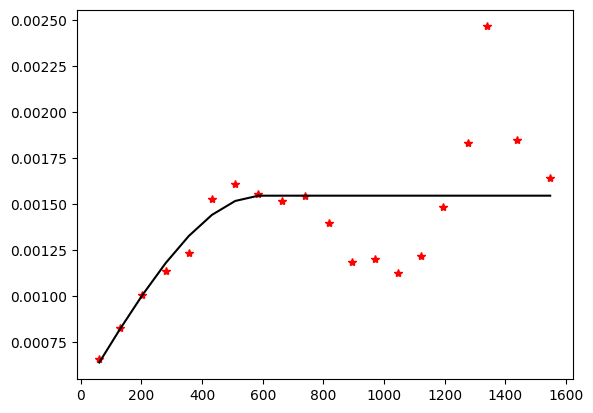

Calculating statistics on variogram model fit...
Q1 = 0.0930350288554256
Q2 = 1.042195063204442
cR = 0.0008697586303625729 



In [28]:
nlags=20
ok3d = OrdinaryKriging3D(np.array(df[0]),np.array(df[1]),np.array(df[2]), np.array(normal_datas),variogram_model="spherical",nlags=nlags,verbose=True,enable_plotting=True,pseudo_inv=True)



c:\Anaconda3\envs\py38\lib\site-packages\gstools\covmodel\plot.py:121: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Spherical(dim=3, var=0.00121, len_scale=6.72e+02, nugget=0.000462)


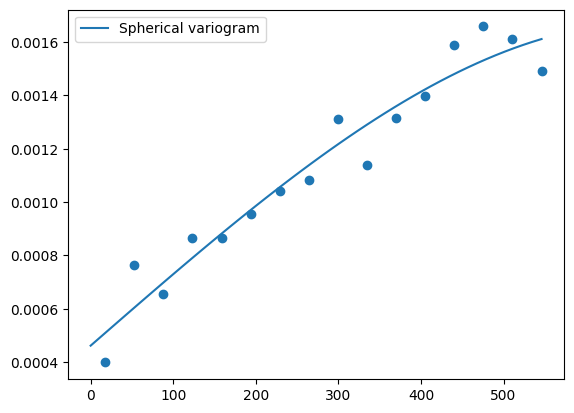

In [32]:
bin_center, gamma = gs.vario_estimate((np.array(df[0]),np.array(df[1]),np.array(df[2])), np.array(normal_datas))
fit_model = gs.Spherical(dim=3,var=1,len_scale=2)
fit_model.fit_variogram(bin_center, gamma, nugget=True)
    # # output
ax = fit_model.plot(x_max=max(bin_center))
ax.scatter(bin_center, gamma)
print(fit_model)

In [ ]:
# grid_np=np.loadtxt('./result/res_RFR_zones2.txt')
# print(np.min(grid_np[:,0])-np.max(grid_np[:,0]))
# print(np.min(grid_np[:,1])-np.max(grid_np[:,1]))
# print(np.min(grid_np[:,2]),np.max(grid_np[:,2]))